In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/SpamData/03_Testing/prob-all-tokens.txt'
TEST_FEATURE_MATRIX = 'SpamData/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

In [3]:
PROB_SPAM = 0.3116

In [4]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

In [5]:
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [6]:
np.log(prob_token_spam[:5])

array([-4.40750247, -5.25357728, -4.98997971, -4.48228141, -4.98833768])

In [8]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [9]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens))  + np.log(1-PROB_SPAM)

In [10]:
prediction=joint_log_spam > joint_log_ham

In [11]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [12]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [13]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [15]:
joint_log_spam[:10]

array([-1220.35894246,  -262.91561244,  -411.40878513, -1473.13411426,
       -1240.03321643,  -356.94015433,  -540.10272712,  -262.91561244,
        -571.70888148, -2173.30504702])

In [16]:
joint_log_ham[:10]

array([-1305.60299959,  -276.08466502,  -469.96737768, -1550.01253883,
       -1314.34553431,  -351.04444157,  -620.50630934,  -276.08466502,
        -623.08524099, -2055.91685894])

In [17]:
prediction = joint_log_spam > joint_log_ham

In [18]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [19]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [20]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
# Metrics and Evaluation
correct_docs=(y_test == prediction).sum()
correct_docs

1685

In [22]:
numdocs_wrong =(y_test != prediction).sum()
numdocs_wrong

39

In [23]:
correct_docs+numdocs_wrong

1724

In [24]:
# Plotting....Styling
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
labels = 'Actual Category'

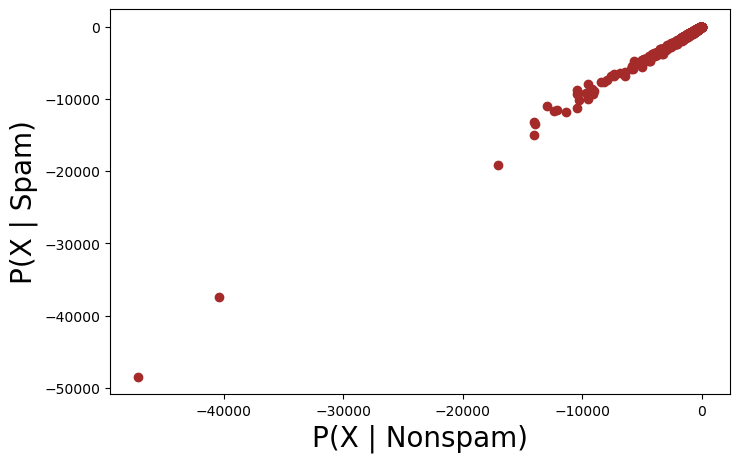

In [25]:
plt.figure(figsize=(8, 5))
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.scatter(joint_log_ham, joint_log_spam, color='brown')
plt.show()

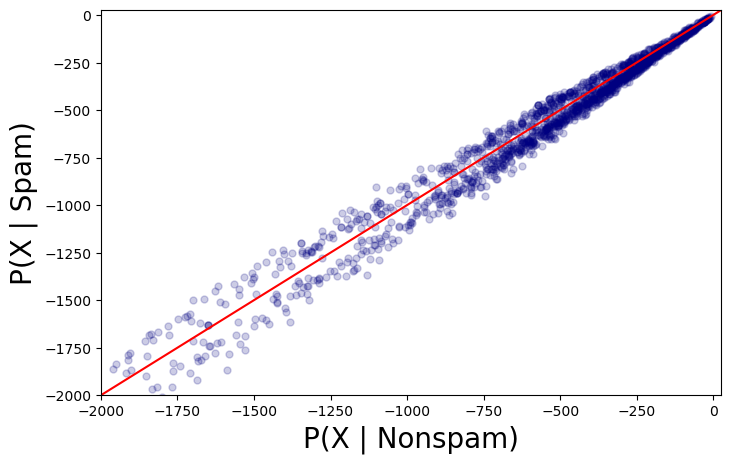

In [26]:
linedata = np.linspace(start=-2000, stop=25, num=1000)
plt.figure(figsize=(8, 5))
plt.xlim([-2000, 25])
plt.ylim([-2000, 25])
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.plot(linedata, linedata, color ='red')
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.2, s = 25)
plt.show()

In [27]:
sns.set_style('whitegrid')
summary_df=pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels:y_test})
summary_df

,P(X | Spam),P(X | Nonspam),Actual Category
0,-1220.358942,-1305.603000,1.0
1,-262.915612,-276.084665,1.0
2,-411.408785,-469.967378,1.0
3,-1473.134114,-1550.012539,1.0
4,-1240.033216,-1314.345534,1.0
...,...,...,...
1719,-1997.332671,-2109.295613,0.0
1720,-875.877756,-787.159584,0.0
1721,-4803.147897,-4367.488439,0.0
1722,-200.681367,-190.837535,0.0


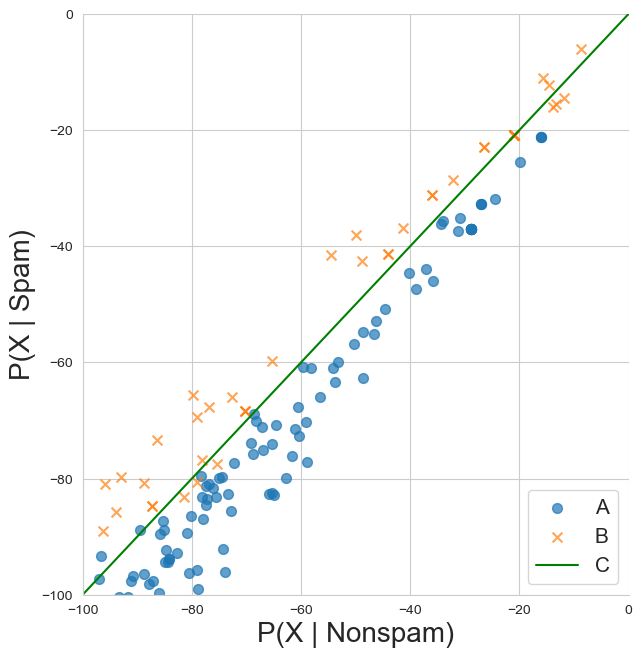

In [28]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, fit_reg = False, height = 6.5, hue=labels,
          
          markers = ['o', 'x'],legend = False, scatter_kws={'alpha' : 0.7, 's' : 50})

plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.xlim([-100, 0])
plt.ylim([-100, 0])
plt.plot(linedata, linedata, color = 'green')

plt.legend(('A', 'B', 'C'), loc = 'lower right', fontsize = 15)

plt.show()

In [29]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [30]:
true_pos = (y_test ==1) & (prediction ==1)
true_pos.sum()

569

In [31]:
false_pos = (y_test ==0) & (prediction ==1)
false_pos.sum()

19

In [32]:
true_neg = (y_test ==0) & (prediction ==0)
true_neg.sum()

1116

In [33]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

In [34]:
# Recall_score: helps when cost of false negatives are high....
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
recall_score

0.966044142614601

In [35]:
# Precision_score: helps when the cost of false positives are high...
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
precision_score

0.967687074829932

In [36]:
# f1 score or the fscore:
# f1 is an overall measure of a model’s accuracy that combines precision and recall
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
f1_score

0.9668649107901445